In [1]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
# Veri setinin bulunduğu dizin
data_dir = "kneedataset/"

# Görüntü boyutları
img_width, img_height = 150, 150

# Veri ve etiket listeleri
data = []
labels = []

In [4]:
# Klasörlerdeki görüntüleri dolaşma
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = load_img(image_path, target_size=(img_width, img_height))
            image = img_to_array(image)
            data.append(image)
            labels.append(class_name)

In [5]:
# Veri ve etiketleri numpy dizisine dönüştürme
data = np.array(data, dtype=np.float32)
labels = np.array(labels)

# Etiketleri işleme
label_mapping = {
    '0Normal': 0,
    '1Mild': 1,
    '2Moderate': 2,
    '3Severe': 3,
    '4Doubtful': 4
}

In [6]:
labels_encoded = np.array([label_mapping[label] for label in labels])
labels_encoded = to_categorical(labels_encoded)

# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)

In [7]:
# Görüntüleri normalize etme
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
# Model oluşturma ve eğitim
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='elu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))  # Add dropout layer with dropout rate of 0.5
model.add(Dense(len(label_mapping), activation='softmax'))

In [19]:
model2 = Sequential()
model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(256, (3, 3), activation='sigmoid'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.5))  # Add dropout layer with dropout rate of 0.5
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))  # Add dropout layer with dropout rate of 0.5
model2.add(Dense(len(label_mapping), activation='softmax'))

# Print model summary
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 17, 17, 256)     

In [22]:
# Model oluşturma
model3 = Sequential()
model3.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(32, (3, 3), activation='tanh'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))  # Add dropout layer with dropout rate of 0.5
model3.add(Dense(len(label_mapping), activation='softmax'))

In [33]:
# Modeli derleme  #optimizer = adagrad 
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Modeli derleme
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Modeli derleme
model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# Modeli eğitme
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
42/42 [==============================] - 10s 223ms/step - loss: 1.3984 - accuracy: 0.4136 - val_loss: 1.3916 - val_accuracy: 0.3939
Epoch 2/10
42/42 [==============================] - 9s 209ms/step - loss: 1.2581 - accuracy: 0.4553 - val_loss: 1.4520 - val_accuracy: 0.3636
Epoch 3/10
42/42 [==============================] - 9s 208ms/step - loss: 1.1848 - accuracy: 0.5023 - val_loss: 1.3167 - val_accuracy: 0.4758
Epoch 4/10
42/42 [==============================] - 9s 209ms/step - loss: 1.1545 - accuracy: 0.5159 - val_loss: 1.3056 - val_accuracy: 0.4697
Epoch 5/10
42/42 [==============================] - 9s 209ms/step - loss: 1.1292 - accuracy: 0.5227 - val_loss: 1.3439 - val_accuracy: 0.4212
Epoch 6/10
42/42 [==============================] - 9s 206ms/step - loss: 1.1215 - accuracy: 0.5152 - val_loss: 1.3088 - val_accuracy: 0.4424
Epoch 7/10
42/42 [==============================] - 9s 212ms/step - loss: 1.1075 - accuracy: 0.5439 - val_loss: 1.2989 - val_accuracy: 0.4667
Epoch

In [29]:
# Modeli eğitme
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
42/42 [==============================] - 29s 670ms/step - loss: nan - accuracy: 0.2977 - val_loss: nan - val_accuracy: 0.3515
Epoch 2/10
42/42 [==============================] - 28s 675ms/step - loss: nan - accuracy: 0.3015 - val_loss: nan - val_accuracy: 0.3515
Epoch 3/10
42/42 [==============================] - 29s 695ms/step - loss: nan - accuracy: 0.3015 - val_loss: nan - val_accuracy: 0.3515
Epoch 4/10
42/42 [==============================] - 28s 671ms/step - loss: nan - accuracy: 0.3015 - val_loss: nan - val_accuracy: 0.3515
Epoch 5/10
42/42 [==============================] - 28s 669ms/step - loss: nan - accuracy: 0.3015 - val_loss: nan - val_accuracy: 0.3515
Epoch 6/10
42/42 [==============================] - 30s 705ms/step - loss: nan - accuracy: 0.3015 - val_loss: nan - val_accuracy: 0.3515
Epoch 7/10
42/42 [==============================] - 29s 701ms/step - loss: nan - accuracy: 0.3015 - val_loss: nan - val_accuracy: 0.3515
Epoch 8/10
42/42 [=======================

In [32]:
# Modeli eğitme
history3 = model3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
42/42 [==============================] - 4s 88ms/step - loss: 4.6678 - accuracy: 0.2871 - val_loss: 1.6053 - val_accuracy: 0.2576
Epoch 2/10
42/42 [==============================] - 4s 92ms/step - loss: 1.5942 - accuracy: 0.2970 - val_loss: 1.5921 - val_accuracy: 0.2606
Epoch 3/10
42/42 [==============================] - 4s 84ms/step - loss: 1.5823 - accuracy: 0.2955 - val_loss: 1.5831 - val_accuracy: 0.2576
Epoch 4/10
42/42 [==============================] - 3s 78ms/step - loss: 1.5726 - accuracy: 0.2955 - val_loss: 1.5741 - val_accuracy: 0.2576
Epoch 5/10
42/42 [==============================] - 3s 75ms/step - loss: 1.5649 - accuracy: 0.2955 - val_loss: 1.5681 - val_accuracy: 0.2576
Epoch 6/10
42/42 [==============================] - 3s 76ms/step - loss: 1.5586 - accuracy: 0.2955 - val_loss: 1.5631 - val_accuracy: 0.2576
Epoch 7/10
42/42 [==============================] - 3s 81ms/step - loss: 1.5537 - accuracy: 0.2955 - val_loss: 1.5572 - val_accuracy: 0.2576
Epoch 8/10
42

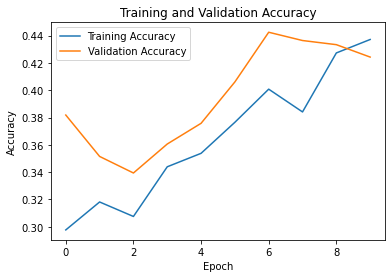

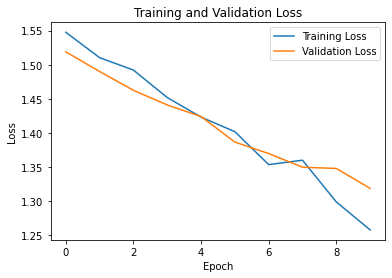

In [11]:
#burada history,history2 veya history3 grafikleri yazdırılabilir
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Loss değerlerini al
loss = history.history['loss']
val_loss = history.history['val_loss']

# Accuracy grafiği
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss grafiği
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
model.save("model.h5")
model2.save("model2.h5")
model3.save("model3.h5")